<!--NAVIGATION-->
<a href="https://colab.research.google.com/github/masdeseiscaracteres/ml_course/blob/master/exercises/03_01_feature_selection_EDA.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Google Colab" title="Abrir y ejecutar en Google Colab"/></a>

# Estimación del precio de una vivienda 

En este notebook haremos un análisis exploratorio básico de la base de datos de viviendas [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction) para familiarizarnos con los datos y, posteriormente, aplicar técnicas de machine learning sobre ellos. 

Para cada vivienda, se tienen los siguientes atributos (en ocasiones también llamados características o *features*):

| Atributo | descripción |
| :- |:- |
| *id*| identificador de la vivienda|
| *date*| fecha
| *price*| precio
| *bedrooms*| número de habitaciones
| *bathrooms*| número de baños/aseos
| *sqtf_living*| superficie habitable (en pies al cuadrado)
| *sqft_lot*| superficie de la parcela (en pies al cuadrado)
| *floors*| número de plantas
| *waterfront*| indica si la vivienda tiene acceso a un lago
| *view*| tipo de vista (variable numérica)
| *condition*| condición de la vivienda (variable númerica)
| *grade*| medida de la calidad de la construcción (variable numérica)
| *sqft_above*| superficie por encima del suelo (en pies al cuadrado)
| *sqft_basement*| superficie del sótano (en pies al cuadrado)
| *yr_built*| año de construcción de la vivienda
| *yr_renovated*| año de renovación de la vivienda
| *lat*| latitud de la parcela
| *long*| longitud de la parcela
| *sqft_living15*| superficie habitable promedio de los 15 vecinos más cercanos 				
| *sqft_lot15*| superficie de la parcela promedio de los 15 vecinos más cercanos

Para representar los datos, vamos a utilizar *DataFrames* de [Pandas](http://pandas.pydata.org/). Pandas es una biblioteca de código abierto para el lenguaje de programación Python y es una de las más utilizadas para análisis de datos. Proporciona estructuras de datos fáciles de utilizar para la representación de datos tabulares. Como guía de referencia básica, puede consultarse el [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

## 0. Configuración del entorno

In [1]:
# clonar el resto del repositorio si no está disponible
import os
curr_dir = os.getcwd()
if not os.path.exists(os.path.join(curr_dir, '../.ROOT_DIR')):
    !git clone https://github.com/masdeseiscaracteres/ml_course.git ml_course
    os.chdir(os.path.join(curr_dir, 'ml_course/exercises'))

In [2]:
# cargamos librerías necesarias
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import seaborn as sns

## 1. Carga y limpieza de datos

In [3]:
house_data = pd.read_csv("./data/kc_house_data.csv") # cargamos fichero (le permitimos inferir automáticamente el tipo de datos en cada columna)
house_data.head(5)                                   # visualizamos 5 primeras filas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# mostramos información básica sobre la estructura de datos
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


Podemos observar que los datos se están representando como un DataFrame y constan de un total de 21613 filas con ejemplos de datos y 21 columnas que contienen las variables asociadas a cada ejemplo.

Todas las variables son de tipo numérico (bien números enteros, `int64`, o números reales, `float64`) excepto la columna `date`. Recordemos que en el fichero de origen, que es un fichero de texto, todos los datos están representados como texto. La función que hemos utilizado para cargar los datos, `pd.read_csv`, se ha encargado de inferir el tipo de datos existente en cada columna y convertirlos al tipo adecuado para nuestra comodidad. Siempre debemos asegurarnos que los datos se representan con el tipo adecuado. Podemos controlar el mecanismo automático de inferencia o incluso desactivarlo mediante algunos de los argumentos de [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

En este caso, como todos los tipos de datos han sido inferidos correctamente y son numéricos, no tenemos que codificar ninguna columna para poder ser utilizada por los algoritmos. Por otro lado, los atributos `id` y `date` no nos aportan información, así que los descartamos del DataFrame.

In [5]:
# Eliminamos las columnas id y date 
house_data = house_data.drop(['id','date'], axis=1)
house_data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Antes seguir con nuestro análisis, vamos a transformar las variables de superficie para expresarlas en metros cuadrados ($m^2$). Posteriormente, renombraremos las columnas.

In [6]:
# convertir las variables en pies al cuadrado en metros al cuadrado 
feetFeatures = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
house_data[feetFeatures] = house_data[feetFeatures].apply(lambda x: x * 0.3048 * 0.3048)

# renombramos las columnas
house_data.columns = ['price','bedrooms','bathrooms','sqm_living','sqm_lot','floors','waterfront','view','condition',
                      'grade','sqm_above','sqm_basement','yr_built','yr_renovated','zip_code','lat','long',
                      'sqm_living15','sqm_lot15']

# visualizamos las primeras filas
house_data.head(5)

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zip_code,lat,long,sqm_living15,sqm_lot15
0,221900.0,3,1.00,109.625587,524.902176,1.0,0,0,3,7,109.625587,0.000000,1955,0,98178,47.5112,-122.257,124.490074,524.902176
1,538000.0,3,2.25,238.760813,672.803816,2.0,0,0,3,7,201.599597,37.161216,1951,1991,98125,47.7210,-122.319,157.006138,709.686323
2,180000.0,2,1.00,71.535341,929.030400,1.0,0,0,3,6,71.535341,0.000000,1933,0,98028,47.7379,-122.233,252.696269,748.984308
3,604000.0,4,3.00,182.089958,464.515200,1.0,0,0,5,7,97.548192,84.541766,1965,0,98136,47.5208,-122.393,126.348134,464.515200
4,510000.0,3,2.00,156.077107,750.656563,1.0,0,0,3,8,156.077107,0.000000,1987,0,98074,47.6168,-122.045,167.225472,697.051509


In [7]:
# convertimos la variable año de construcción a años de antigüedad
house_data['years'] = pd.Timestamp('now').year - house_data['yr_built']
house_data.head(5)

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zip_code,lat,long,sqm_living15,sqm_lot15,years
0,221900.0,3,1.00,109.625587,524.902176,1.0,0,0,3,7,109.625587,0.000000,1955,0,98178,47.5112,-122.257,124.490074,524.902176,65
1,538000.0,3,2.25,238.760813,672.803816,2.0,0,0,3,7,201.599597,37.161216,1951,1991,98125,47.7210,-122.319,157.006138,709.686323,69
2,180000.0,2,1.00,71.535341,929.030400,1.0,0,0,3,6,71.535341,0.000000,1933,0,98028,47.7379,-122.233,252.696269,748.984308,87
3,604000.0,4,3.00,182.089958,464.515200,1.0,0,0,5,7,97.548192,84.541766,1965,0,98136,47.5208,-122.393,126.348134,464.515200,55
4,510000.0,3,2.00,156.077107,750.656563,1.0,0,0,3,8,156.077107,0.000000,1987,0,98074,47.6168,-122.045,167.225472,697.051509,33


## 2. Análisis exploratorio

Ahora que ya tenemos cargados los datos que queremos analizar en un objeto Pandas, vamos a realizar un análisis básico de los mismos. 

Una buena práctica es intentar obtener un resumen estadístico lo más completo posible de los datos. Habitualmente nos interesa saber la media y desviación estándar, la fracción de valores nulos, los cuartiles de cada una de las variables, etc. Esto nos permitirá, por un lado, tener una idea de cómo son las ditribuciones de cada una de las variables y, por otro, nos permitirá verificar si existen datos anómalos, también conocidos como [**outliers**](https://en.wikipedia.org/wiki/Outlier).

Para esta tarea es útil el método `describe`. Si se desea hacer un análisis más completo, existen herramientas específicas para esta tarea como [`pandas-profiling`](https://github.com/pandas-profiling/pandas-profiling).

In [8]:
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.000000,321950.000000,450000.000000,645000.000000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.000000,3.000000,3.000000,4.000000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.000000,1.750000,2.250000,2.500000,8.000000e+00
sqm_living,21613.0,193.229008,85.325951,26.941882,132.572638,177.444806,236.902752,1.257907e+03
sqm_lot,21613.0,1403.483212,3848.091438,48.309581,468.231322,707.735359,992.947692,1.534163e+05
floors,21613.0,1.494309,0.539989,1.000000,1.000000,1.500000,2.000000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.000000,0.000000,0.000000,0.000000,1.000000e+00
view,21613.0,0.234303,0.766318,0.000000,0.000000,0.000000,0.000000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.000000,3.000000,3.000000,4.000000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.000000,7.000000,7.000000,8.000000,1.300000e+01


A pesar de este resumen, conviene siempre hacer representaciones gráficas, que nos ofrecen, en general un mejor entendimiento de los datos. Para ello vamos representar los histogramas de algunos atributos: `bedrooms`, `sqm_living` y `yr_built`.

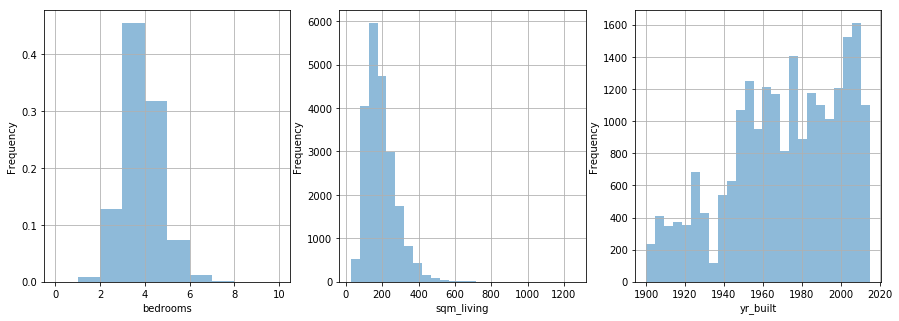

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
house_data['bedrooms'].plot.hist(alpha=0.5, bins=10, density=1, range = [0,10], grid = True)
#plt.axis([0, 10, 0, 10000])
plt.xlabel('bedrooms')

plt.subplot(1,3,2)
house_data['sqm_living'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('sqm_living')

plt.subplot(1,3,3)
house_data['yr_built'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('yr_built')

plt.show()

Una vez que hemos analizado las variables por separado, el siguiente paso en un análisis exploratorio sería el entender las relaciones entre cada una de las variables/atributos ($\mathbf{x}$) y la variable objetivo ($y$). 

Para ello vamos a utilizar un [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot) con la variable objetivo, $y$, como variable dependiente, y alguna una de las variables explicativas como variables independientes. En el caso de la variable *waterfront*, dado que ésta es binaria, vamos a utilizar un [boxplot](https://en.wikipedia.org/wiki/Box_plot).

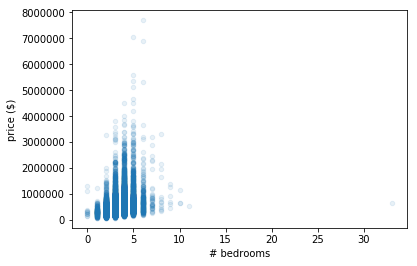

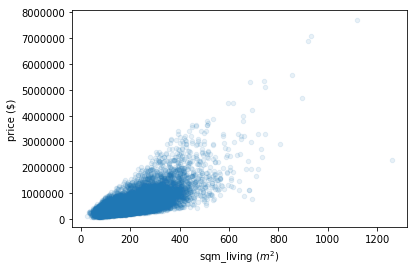

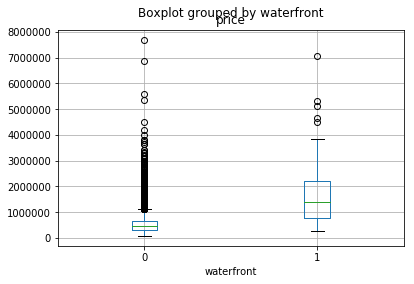

In [10]:
# Sólo representamos 3 variables: bedrooms, sqm_living y waterfront
# el resto se puede repetir una a una
# La utilización de transparencia (alpha) puede ser útil para apreciar la densidad de los datos

house_data.plot(kind = 'scatter', x='bedrooms', y = 'price', alpha=0.1)
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

house_data.plot(kind = 'scatter', x='sqm_living', y = 'price', alpha=0.1)
plt.xlabel('sqm_living ($m^2$)')
plt.ylabel('price ($)')
plt.show()

house_data.boxplot(by='waterfront', column = 'price')
plt.show()

In [11]:
# por el momento vamos a centrarnos en viviendas por debajo de los 600 m^2
sel = house_data.sqm_living <= 600

print(house_data.shape)
house_data = house_data[sel]
print(house_data.shape)
house_data.head()

(21613, 20)
(21568, 20)


,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zip_code,lat,long,sqm_living15,sqm_lot15,years
0,221900.0,3,1.00,109.625587,524.902176,1.0,0,0,3,7,109.625587,0.000000,1955,0,98178,47.5112,-122.257,124.490074,524.902176,65
1,538000.0,3,2.25,238.760813,672.803816,2.0,0,0,3,7,201.599597,37.161216,1951,1991,98125,47.7210,-122.319,157.006138,709.686323,69
2,180000.0,2,1.00,71.535341,929.030400,1.0,0,0,3,6,71.535341,0.000000,1933,0,98028,47.7379,-122.233,252.696269,748.984308,87
3,604000.0,4,3.00,182.089958,464.515200,1.0,0,0,5,7,97.548192,84.541766,1965,0,98136,47.5208,-122.393,126.348134,464.515200,55
4,510000.0,3,2.00,156.077107,750.656563,1.0,0,0,3,8,156.077107,0.000000,1987,0,98074,47.6168,-122.045,167.225472,697.051509,33


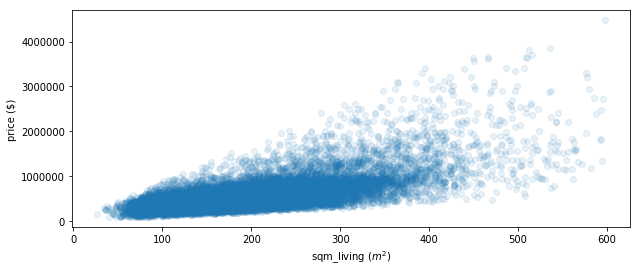

In [12]:
plt.figure(figsize = (10,4))
plt.scatter(house_data.sqm_living, house_data.price, alpha=0.1)
plt.xlabel('sqm_living ($m^2$)')
plt.ylabel('price ($)')
plt.show()

Una vez que hemos hecho un primer análisis exploratorio, el siguiente paso consiste en evaluar las correlaciones entre las diferente variables del problema. Habitualmente, esto nos puede servir para identificar posibles atributos que estén altamente correlacionados. 

Si la correlación entre dos atributos es muy grande, se dice que la matriz de atributos es singular y, como ya vimos, esto es una fuente de error importante en algunos algoritmos de machine learning, como por ejemplo en el caso de la [regresión lineal](https://es.wikipedia.org/wiki/Regresión_lineal). 

Este problema se denomina *colinealidad*. Para hacer frente a él, normalmente se evalúa [coeficiente de correlación](https://es.wikipedia.org/wiki/Coeficiente_de_correlación_de_Pearson) ($\rho$) entre las diferentes atributos de tal forma que se descartan los que tengan un $\rho$ superior a un umbral que establezcamos a priori ($|\rho|>0.9$, por ejemplo). Hay que tener en cuenta que $-1<\rho<1$, de tal forma que valores próximos a $0$ indican que no hay correlación y valores próximos a $1$ o $-1$ indican una alta correlación.

Calculamos la matriz de correlación:

In [13]:
house_data.corr() # matriz de correlación

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zip_code,lat,long,sqm_living15,sqm_lot15,years
price,1.000000,0.305467,0.510356,0.684604,0.083145,0.262169,0.247350,0.392966,0.042095,0.671409,0.588258,0.298468,0.052127,0.122914,-0.049883,0.324528,0.021261,0.593884,0.075660,-0.052127
bedrooms,0.305467,1.000000,0.511765,0.579499,0.026752,0.172023,-0.011400,0.072633,0.029003,0.350153,0.474325,0.296342,0.153713,0.017091,-0.152505,-0.010176,0.129362,0.386856,0.024290,-0.153713
bathrooms,0.510356,0.511765,1.000000,0.746721,0.074433,0.503544,0.053973,0.173805,-0.125079,0.656742,0.674477,0.264786,0.511900,0.046528,-0.204648,0.022335,0.224613,0.563599,0.074308,-0.511900
sqm_living,0.684604,0.579499,0.746721,1.000000,0.160094,0.356643,0.086397,0.268373,-0.057879,0.759194,0.870697,0.414826,0.325398,0.049725,-0.202541,0.050445,0.245538,0.760903,0.172612,-0.325398
sqm_lot,0.083145,0.026752,0.074433,0.160094,1.000000,-0.008758,0.021497,0.069010,-0.007361,0.105247,0.170983,0.007967,0.050227,0.007906,-0.129621,-0.088530,0.227516,0.141735,0.710688,-0.050227
floors,0.262169,0.172023,0.503544,0.356643,-0.008758,1.000000,0.022365,0.025270,-0.264077,0.457993,0.529278,-0.256756,0.490111,0.005919,-0.058788,0.048890,0.125187,0.277886,-0.015700,-0.490111
waterfront,0.247350,-0.011400,0.053973,0.086397,0.021497,0.022365,1.000000,0.397969,0.017714,0.072988,0.059691,0.064580,-0.028753,0.090649,0.032856,-0.016406,-0.043490,0.079992,0.031661,0.028753
view,0.392966,0.072633,0.173805,0.268373,0.069010,0.025270,0.397969,1.000000,0.047538,0.240091,0.150698,0.264835,-0.057374,0.102816,0.087889,0.004704,-0.081772,0.272370,0.066325,0.057374
condition,0.042095,0.029003,-0.125079,-0.057879,-0.007361,-0.264077,0.017714,0.047538,1.000000,-0.144777,-0.159507,0.177854,-0.361132,-0.060796,0.002706,-0.014816,-0.106153,-0.092733,-0.001855,0.361132
grade,0.671409,0.350153,0.656742,0.759194,0.105247,0.457993,0.072988,0.240091,-0.144777,1.000000,0.750542,0.149324,0.449633,0.010811,-0.184700,0.113240,0.198580,0.709924,0.112344,-0.449633


Dibujamos el valor absoluto de las correlaciones para identificar a simple vista las variables más colineales.

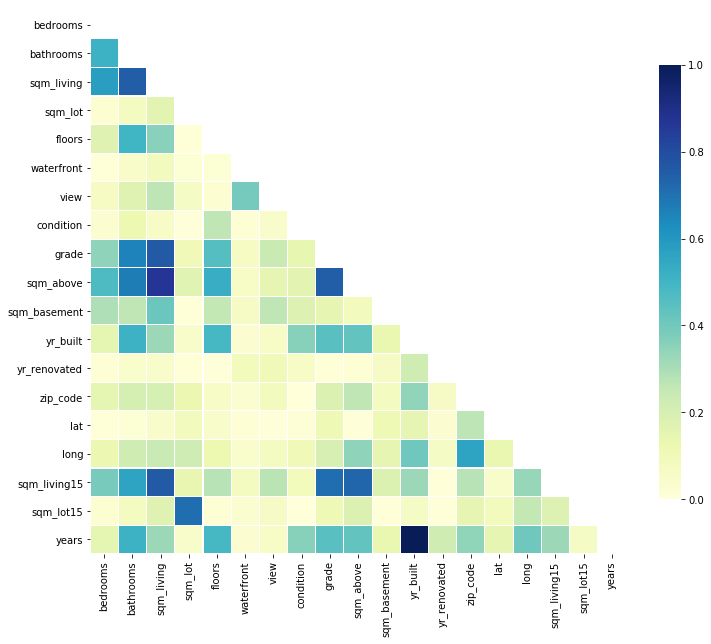

In [14]:
# Compute the correlation matrix
corr = np.abs(house_data.drop(['price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Otra alternativa es hacer un *scatter plot* de todas las variables frente al resto, para tener una idea de cómo se relacionan las variables del problema. También es recomendable visualizar al mismo tiempo la distribución de cada una de las variables.

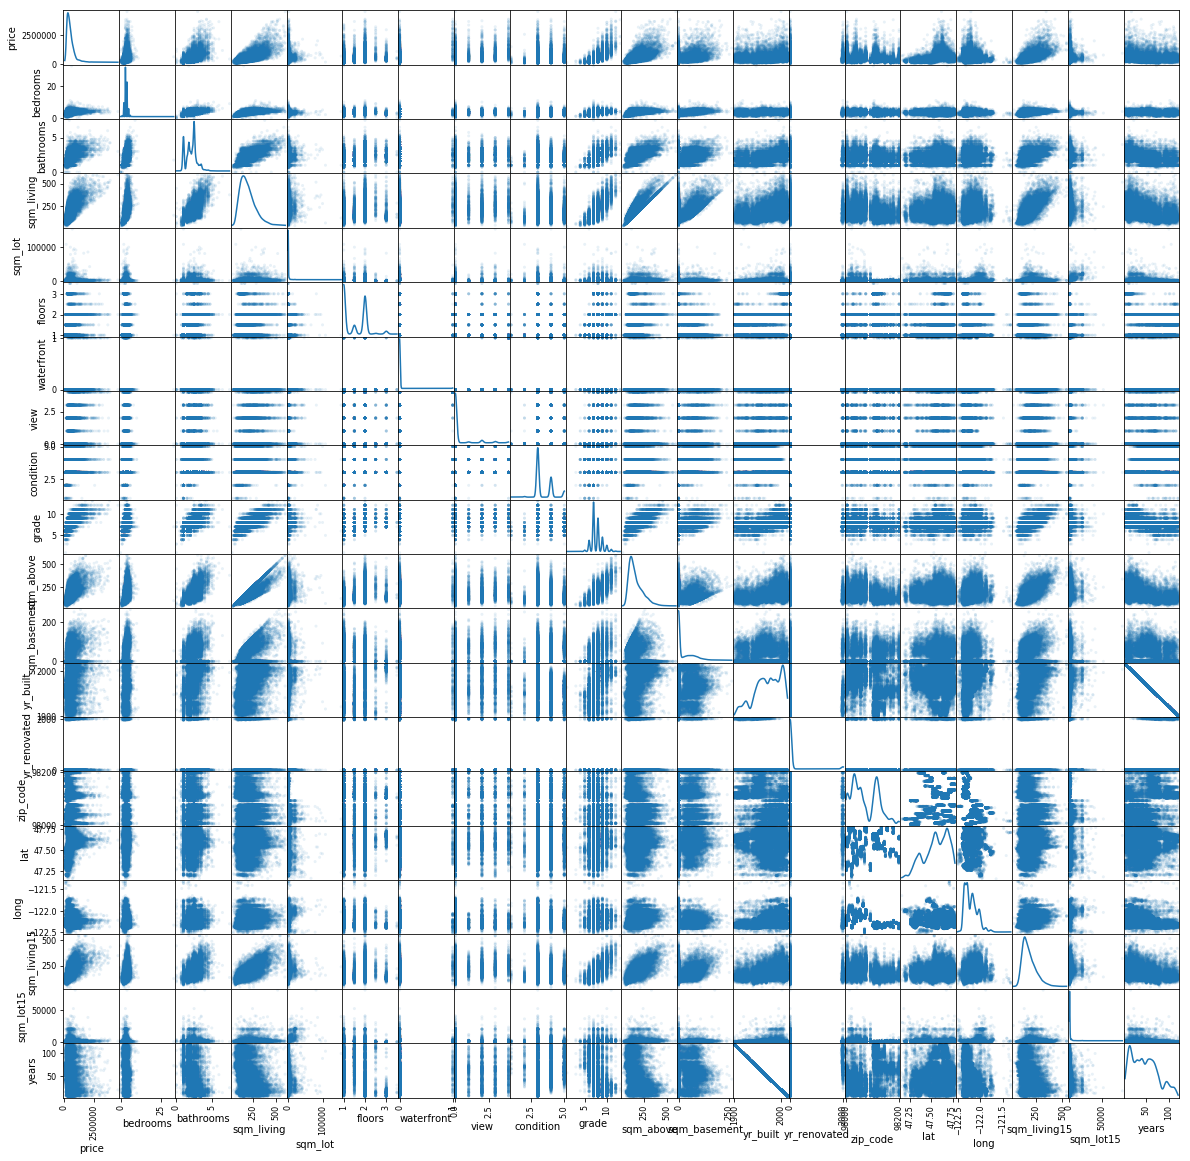

In [15]:
pd.plotting.scatter_matrix(house_data, alpha=0.1, figsize=(20, 20), diagonal = 'kde')
plt.show()

Una vez tenemos esta información, es el momento de pensar sobre otras variables que tengan sentido, y de eliminar variables con alta correlación. Algunos ejemplos:

- Eliminar `sqm_living` o bien `sqm_above`.
- Utilizar el atributo antigüedad de la casa, `years`, en lugar del año de construcción, `yr_built`.